In [ ]:
df=pd.read_csv("/content/sample_data/testdata.csv")

In [ ]:
df.describe()

Adj Close
count  778.000000
mean   604.880038
std    102.544825
min    440.123779
25%    511.939224
50%    564.673737
75%    709.863693
max    821.779419

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df["Adj Close"].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.720265
p-value: 0.420703


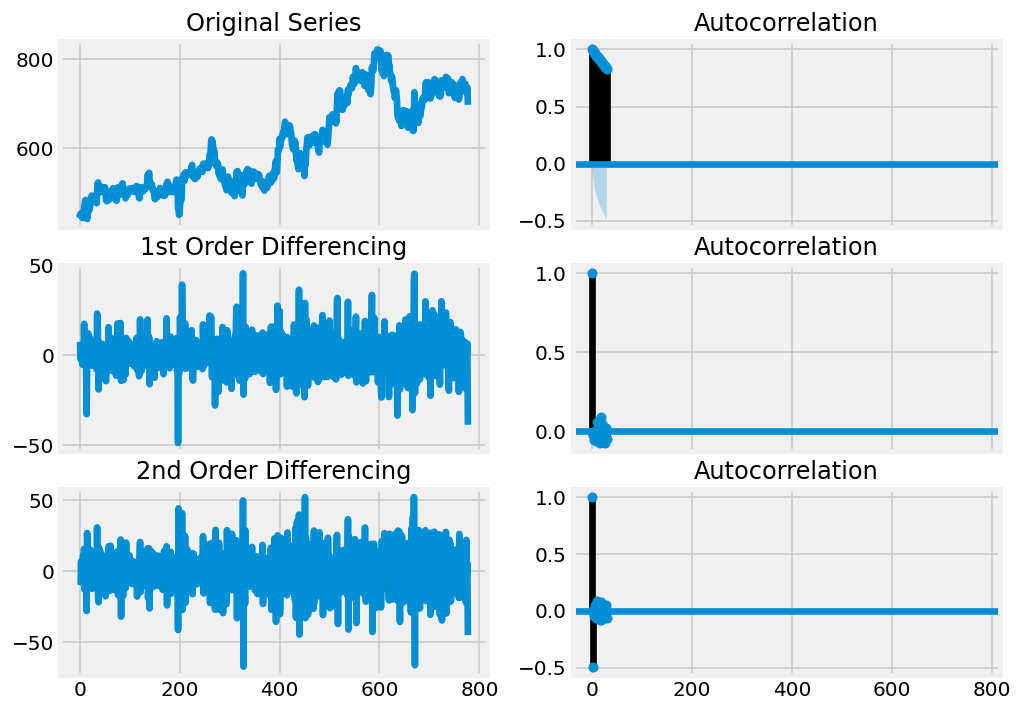

In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = pd.read_csv('/content/sample_data/testdata.csv')

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df["Adj Close"]); axes[0, 0].set_title('Original Series')
plot_acf(df["Adj Close"], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df["Adj Close"].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df["Adj Close"].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df["Adj Close"].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df["Adj Close"].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

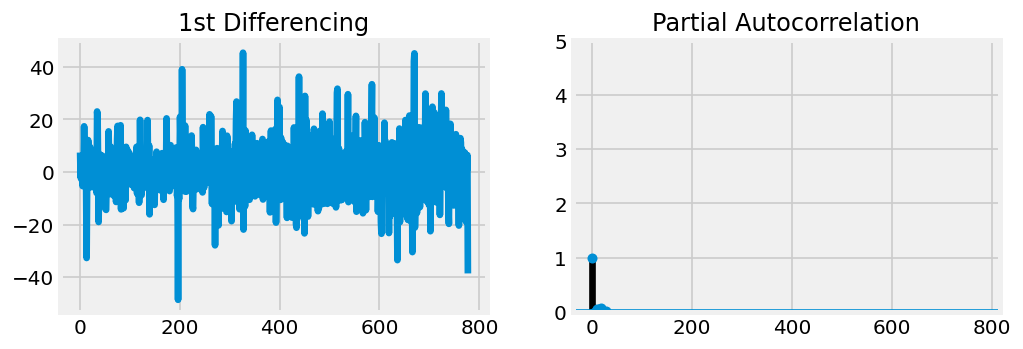

In [ ]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df["Adj Close"].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df["Adj Close"].diff().dropna(), ax=axes[1])

plt.show()

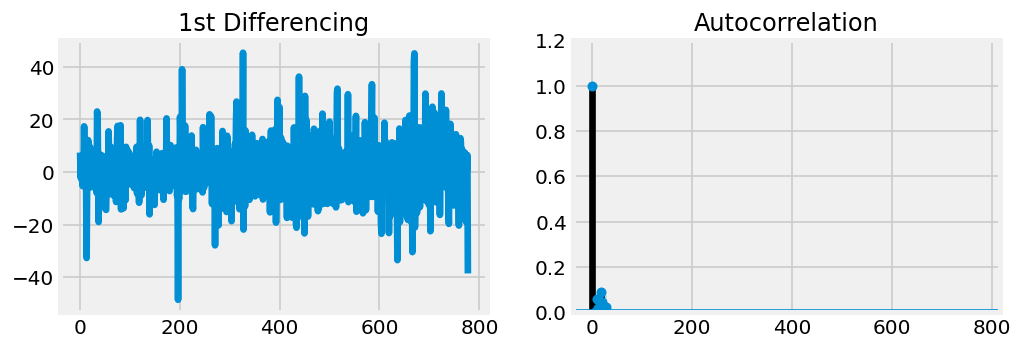

In [ ]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# Import data
df = pd.read_csv('/content/sample_data/testdata.csv')

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df["Adj Close"].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df["Adj Close"].diff().dropna(), ax=axes[1])

plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 1,0,0 ARIMA Model
model = ARIMA(df["Adj Close"], order=(1,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:              Adj Close   No. Observations:                  778
Model:                     ARMA(1, 0)   Log Likelihood               -2932.283
Method:                       css-mle   S.D. of innovations             10.455
Date:                Sat, 20 Jun 2020   AIC                           5870.566
Time:                        14:42:32   BIC                           5884.537
Sample:                             0   HQIC                          5875.940
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             592.2945     65.861      8.993      0.000     463.209     721.380
ar.L1.Adj Close     0.9954      0.003    312.713      0.000       0.989       1.002
                                

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 1,0,1 ARIMA Model
model = ARIMA(df["Adj Close"], order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:              Adj Close   No. Observations:                  778
Model:                     ARMA(1, 1)   Log Likelihood               -2932.193
Method:                       css-mle   S.D. of innovations             10.453
Date:                Sat, 20 Jun 2020   AIC                           5872.385
Time:                        14:44:38   BIC                           5891.012
Sample:                             0   HQIC                          5879.550
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             592.2190     66.754      8.872      0.000     461.383     723.055
ar.L1.Adj Close     0.9956      0.003    317.123      0.000       0.989       1.002
ma.L1.Adj Close    -0.0159      

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 0,0,1 ARIMA Model
model = ARIMA(df["Adj Close"], order=(0,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:              Adj Close   No. Observations:                  778
Model:                     ARMA(0, 1)   Log Likelihood               -4219.895
Method:                       css-mle   S.D. of innovations             54.803
Date:                Sat, 20 Jun 2020   AIC                           8445.790
Time:                        16:08:53   BIC                           8459.760
Sample:                             0   HQIC                          8451.164
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             604.7779      3.802    159.061      0.000     597.326     612.230
ma.L1.Adj Close     0.9364      0.010     97.503      0.000       0.918       0.955
                                

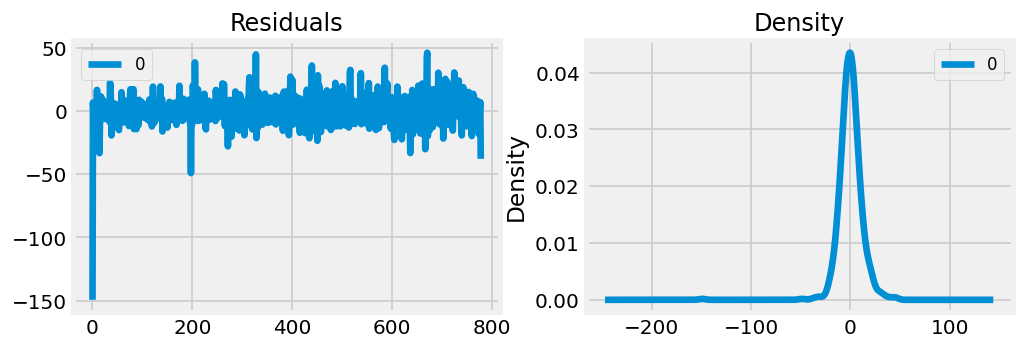

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

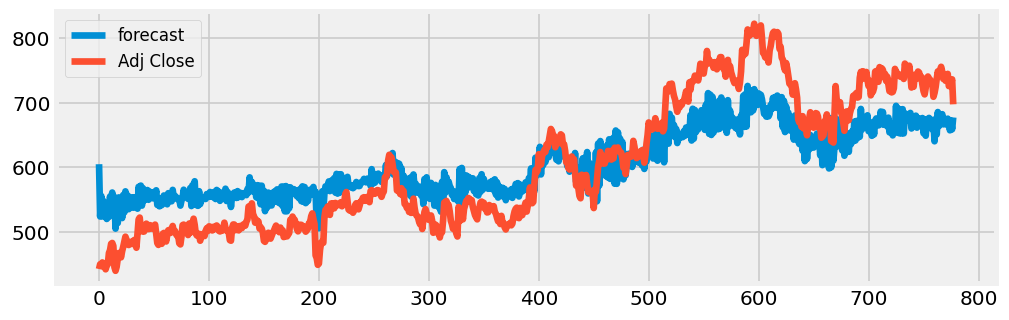

In [ ]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df["Adj Close"][:520]
test = df["Adj Close"][521:]

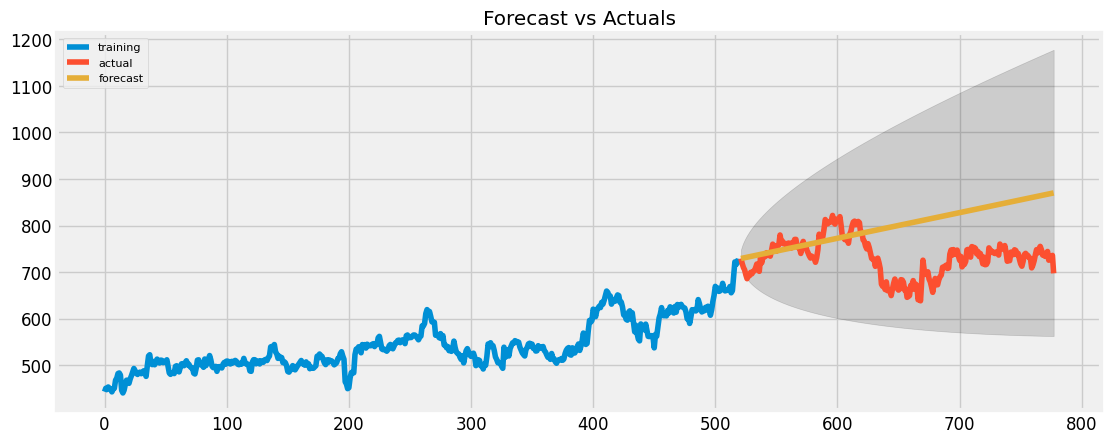

In [ ]:
# Build Model
# model = ARIMA(train, order=(0,1,0))  
model = ARIMA(train, order=(0, 1, 0))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(257, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                  519
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1920.404
Method:                       css-mle   S.D. of innovations              9.789
Date:                Sat, 20 Jun 2020   AIC                           3846.807
Time:                        16:23:03   BIC                           3859.563
Sample:                             1   HQIC                          3851.804
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5502      0.425      1.296      0.196      -0.282       1.383
ar.L1.D.Adj Close    -0.0118      0.044     -0.270      0.787      -0.098       0.074
                        

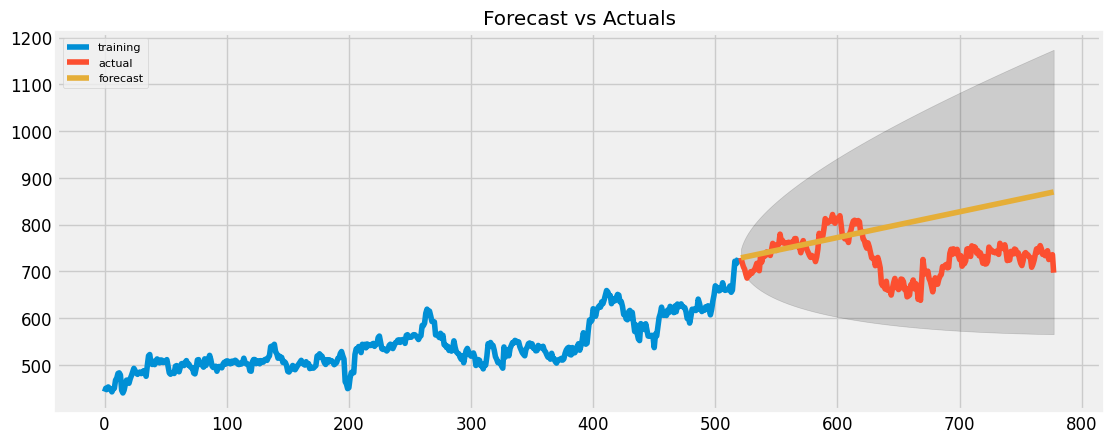

In [ ]:
# Build Model
model = ARIMA(train, order=(1,1,0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(257, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:           D2.Adj Close   No. Observations:                  518
Model:                 ARIMA(6, 2, 0)   Log Likelihood               -1960.209
Method:                       css-mle   S.D. of innovations             10.636
Date:                Sat, 20 Jun 2020   AIC                           3936.418
Time:                        16:40:08   BIC                           3970.418
Sample:                             2   HQIC                          3949.739
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0150      0.122      0.123      0.902      -0.224       0.254
ar.L1.D2.Adj Close    -0.8349      0.043    -19.210      0.000      -0.920      -0.750
ar.L2.D2.Adj Close  

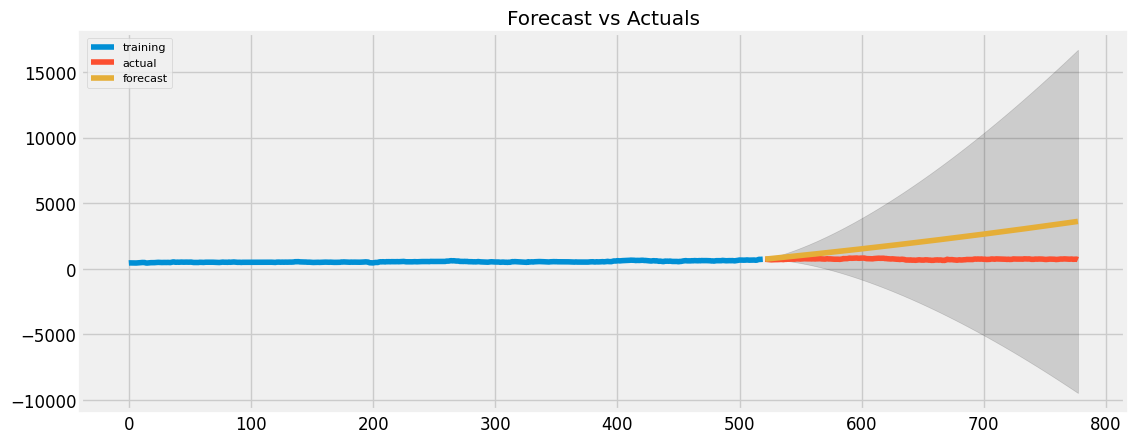

In [ ]:
# Build Model
model = ARIMA(train, order=(6,1,0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(257, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'acf1': 0.9881312593875963,
 'corr': -0.1703561742562043,
 'mae': 1364.2007118480801,
 'mape': 1.8819965524520392,
 'me': 1364.2007118480801,
 'minmax': 0.575381132106386,
 'mpe': 1.8819965524520392,
 'rmse': 1603.1433392691727}

In [114]:
# Build Model
for p in range(0,5):
  for q in range(0,5):
      model = ARIMA(train, order=(p,2,q))  
      fitted = model.fit(disp=-1)  
      print(fitted.summary())
      def forecast_accuracy(forecast, actual):
        rmse = np.mean((forecast - actual)**2)**.5  # RMSE
        return({'rmse':rmse})
        forecast_accuracy(fc, test.values)

                             ARIMA Model Results                              
Dep. Variable:           D2.Adj Close   No. Observations:                  518
Model:                 ARIMA(0, 2, 0)   Log Likelihood               -2099.507
Method:                           css   S.D. of innovations             13.932
Date:                Sat, 20 Jun 2020   AIC                           4203.015
Time:                        17:47:13   BIC                           4211.515
Sample:                             2   HQIC                          4206.345
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0030      0.612      0.005      0.996      -1.197       1.203
                             ARIMA Model Results                              
Dep. Variable:           D2.Adj Close   No. Observat

ValueError: ignored

                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                  519
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1920.404
Method:                       css-mle   S.D. of innovations              9.789
Date:                Sat, 20 Jun 2020   AIC                           3846.807
Time:                        17:15:15   BIC                           3859.563
Sample:                             1   HQIC                          3851.804
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5502      0.425      1.296      0.196      -0.282       1.383
ar.L1.D.Adj Close    -0.0118      0.044     -0.270      0.787      -0.098       0.074
                        

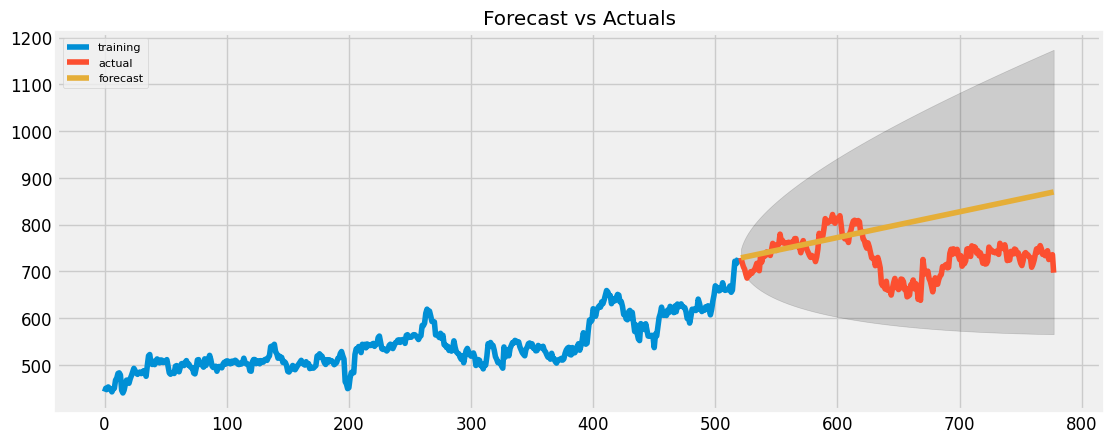

In [ ]:
 # Build Model
model = ARIMA(train, order=(1,1,0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(257, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'acf1': 0.9741687273259814,
 'corr': -0.17618375619233453,
 'mae': 75.84589137605656,
 'mape': 0.10648937854730907,
 'me': 67.47965015189519,
 'minmax': 0.09225632739917888,
 'mpe': 0.09597715253193637,
 'rmse': 91.5864644323943}